In [35]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
url='https://wiki.nhrl.io/wiki/index.php?title=NHRL:Stats:All-Time-3lb'
response = requests.get(url)
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Oops! Received status code {status}")

In [3]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   NHRL:Stats:All-Time-3lb - NHRL
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"b002bda227ef52c46e0d6379","wgCanonicalNamespace":"Project","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":4,"wgPageName":"NHRL:Stats:All-Time-3lb","wgTitle":"Stats:All-Time-3lb","wgCurRevisionId":9227,"wgRevisionId":9227,"wgArticleId":634,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Stats"],"wgPageViewLanguage":"en","wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgRelevantPageName":"NHRL:Stats:All-Time-3lb","wgRelevantAr

### Scraping data and storing as a Dataframe

In [24]:
robot3lbList = []

stats_table = soup.find('table', class_='wikitable sortable').tbody

for row in stats_table.find_all('tr')[1:]:
    cells = row.find_all('td')
    
    if len(cells) > 0:
        rank = cells[0].text.strip()
        bot = cells[2].text.strip()
        events = cells[3].text.strip()
        fights = cells[4].text.strip()
        wins = cells[5].text.strip()
        losses = cells[6].text.strip()
        win_percentage = cells[7].text.strip()
        points = cells[8].text.strip()
        KOs = cells[9].text.strip()
        KOd = cells[10].text.strip()
        avg_time = cells[11].text.strip()

        robot3lbList.append({
            'Rank': rank,
            'Bot': bot,
            'Events': events,
            'Fights': fights,
            'W': wins,
            'L': losses,
            '%': win_percentage,
            'Points': points,
            'KOs': KOs,
            "KO'd": KOd,
            'Average Time' : avg_time,
        })

robot3lb_df = pd.DataFrame(robot3lbList)
robot3lb_df

AttributeError: 'NoneType' object has no attribute 'tbody'

In [45]:
robot3lb_df[['%','Points','Average Time']] = robot3lb_df[['%','Points','Average Time']].astype(float)
robot3lb_df[['Rank','Events','Fights','W','L','KOs',"KO'd"]] = robot3lb_df[['Rank','Events','Fights','W','L','KOs',"KO'd"]].astype(int)
print(robot3lb_df.dtypes)

Rank              int32
Bot              object
Events            int32
Fights            int32
W                 int32
L                 int32
%               float64
Points          float64
KOs               int32
KO'd              int32
Average Time    float64
dtype: object


### Repeat for each table

In [5]:
url='https://wiki.nhrl.io/wiki/index.php?title=NHRL:Stats:All-Time-12lb'
response = requests.get(url)
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Oops! Received status code {status}")

In [6]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   NHRL:Stats:All-Time-12lb - NHRL
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"2e0c804985fa2bb754e2b832","wgCanonicalNamespace":"Project","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":4,"wgPageName":"NHRL:Stats:All-Time-12lb","wgTitle":"Stats:All-Time-12lb","wgCurRevisionId":9229,"wgRevisionId":9229,"wgArticleId":840,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Stats"],"wgPageViewLanguage":"en","wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgRelevantPageName":"NHRL:Stats:All-Time-12lb","wgReleva

In [37]:
robot12lbList = []

stats_table = soup.find('table', class_='wikitable sortable').tbody

for row in stats_table.find_all('tr')[1:]:
    cells = row.find_all('td')
    
    if len(cells) > 0:
        rank = cells[0].text.strip()
        bot = cells[2].text.strip()
        events = cells[3].text.strip()
        fights = cells[4].text.strip()
        wins = cells[5].text.strip()
        losses = cells[6].text.strip()
        win_percentage = cells[7].text.strip()
        points = cells[8].text.strip()
        KOs = cells[9].text.strip()
        KOd = cells[10].text.strip()
        avg_time = cells[11].text.strip()

        robot12lbList.append({
            'Rank': rank,
            'Bot': bot,
            'Events': events,
            'Fights': fights,
            'W': wins,
            'L': losses,
            '%': win_percentage,
            'Points': points,
            'KOs': KOs,
            "KO'd": KOd,
            'Average Time' : avg_time,
        })

robot12lb_df = pd.DataFrame(robot12lbList)
robot12lb_df

AttributeError: 'NoneType' object has no attribute 'tbody'

#### convert datatypes to floats or ints

In [43]:
robot12lb_df[['%','Points','Average Time']] = robot12lb_df[['%','Points','Average Time']].astype(float)
robot12lb_df[['Rank','Events','Fights','W','L','KOs',"KO'd"]] = robot12lb_df[['Rank','Events','Fights','W','L','KOs',"KO'd"]].astype(int)
print(robot12lb_df.dtypes)

Rank              int32
Bot              object
Events            int32
Fights            int32
W                 int32
L                 int32
%               float64
Points          float64
KOs               int32
KO'd              int32
Average Time    float64
dtype: object


### Again for the 30lb table

In [8]:
url='https://wiki.nhrl.io/wiki/index.php?title=NHRL:Stats:All-Time-30lb'
response = requests.get(url)
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Oops! Received status code {status}")

In [9]:
robot30lbList = []

stats_table = soup.find('table', class_='wikitable sortable').tbody

for row in stats_table.find_all('tr')[1:]:
    cells = row.find_all('td')
    
    if len(cells) > 0:
        rank = cells[0].text.strip()
        bot = cells[2].text.strip()
        events = cells[3].text.strip()
        fights = cells[4].text.strip()
        wins = cells[5].text.strip()
        losses = cells[6].text.strip()
        win_percentage = cells[7].text.strip()
        points = cells[8].text.strip()
        KOs = cells[9].text.strip()
        KOd = cells[10].text.strip()
        avg_time = cells[11].text.strip()

        robot30lbList.append({
            'Rank': rank,
            'Bot': bot,
            'Events': events,
            'Fights': fights,
            'W': wins,
            'L': losses,
            '%': win_percentage,
            'Points': points,
            'KOs': KOs,
            "KO'd": KOd,
            'Average Time' : avg_time,
        })

robot30lb_df = pd.DataFrame(robot30lbList)
robot30lb_df

,Rank,Bot,Events,Fights,W,L,%,Points,KOs,KO'd,Average Time
0,1,MegatRON,9,40,32,8,0.800,29.76,21,5,126.10
1,2,Emulsifier,7,32,27,5,0.844,27.05,24,0,105.70
2,3,Yahoo,9,39,28,11,0.718,19.68,17,6,139.70
3,4,Polyester,7,31,21,10,0.677,12.81,14,5,117.80
4,5,Kablooey Tango,7,24,17,7,0.708,11.93,6,2,151.00
...,...,...,...,...,...,...,...,...,...,...,...
154,155,Pipe Bomb (30lb),1,2,0,2,0.000,-5.33,0,1,172.50
155,156,Falcon Zen,1,2,0,2,0.000,-5.34,0,0,0.00
156,157,GOOSE!,1,2,0,2,0.000,-5.34,0,0,0.00
157,158,Rock Bottom,1,2,0,2,0.000,-5.43,0,2,65.00


#### convert datatypes to floats or ints

In [44]:
robot30lb_df[['%','Points','Average Time']] = robot30lb_df[['%','Points','Average Time']].astype(float)
robot30lb_df[['Rank','Events','Fights','W','L','KOs',"KO'd"]] = robot30lb_df[['Rank','Events','Fights','W','L','KOs',"KO'd"]].astype(int)
print(robot30lb_df.dtypes)

Rank              int32
Bot              object
Events            int32
Fights            int32
W                 int32
L                 int32
%               float64
Points          float64
KOs               int32
KO'd              int32
Average Time    float64
dtype: object


### Now scraping the longest win streak tables

#### 3lb longest win streak

In [10]:
url='https://wiki.nhrl.io/wiki/index.php?title=NHRL:Stats:Longest-winning-streak-3lb'
response = requests.get(url)
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Oops! Received status code {status}")

In [11]:
winStreak3List = []

stats_table = soup.find('table', class_='wikitable').tbody

for row in stats_table.find_all('tr')[1:]:
    cells = row.find_all('td')
    
    if len(cells) > 0:
        bot_name = cells[0].text.strip()
        longest_win_streak = cells[1].text.strip()
        KOs = cells[2].text.strip()

        winStreak3List.append({
            'Bot Name': bot_name,
            'Longest Win Streak': longest_win_streak,
            'KOs': KOs
        })

winStreak3df = pd.DataFrame(winStreak3List)
winStreak3df

,Bot Name,Longest Win Streak,KOs
0,Silent Spring,17,11
1,Lynx,17,15
2,Supreme Ruler,16,3
3,Silent X,13,4
4,Narsil,11,6
5,Droopy,10,4
6,Polywog,10,6
7,Chubby Unicorn,10,4
8,Squishy,9,5
9,Caldera,9,5


#### 12lb longest win streak

In [12]:
url='https://wiki.nhrl.io/wiki/index.php?title=NHRL:Stats:Longest-winning-streak-12lb'
response = requests.get(url)
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Oops! Received status code {status}")

In [13]:
winStreak12List = []

stats_table = soup.find('table', class_='wikitable').tbody

for row in stats_table.find_all('tr')[1:]:
    cells = row.find_all('td')
    
    if len(cells) > 0:
        bot_name = cells[0].text.strip()
        longest_win_streak = cells[1].text.strip()
        KOs = cells[2].text.strip()

        winStreak12List.append({
            'Bot Name': bot_name,
            'Longest Win Streak': longest_win_streak,
            'KOs': KOs
        })

winStreak12df = pd.DataFrame(winStreak12List)
winStreak12df

,Bot Name,Longest Win Streak,KOs
0,Maximizer,12,4
1,HotLeafJuice,9,5
2,Saiko!,9,6
3,Voxel (12lb),9,7
4,YOB GNOL,7,5
5,Xupa-Cabra,7,4
6,Honey-fied,7,3
7,Pramheda,6,6
8,Ugee,6,5
9,Full Court,6,0


#### 30lb longest win streak

In [14]:
url='https://wiki.nhrl.io/wiki/index.php?title=NHRL:Stats:Longest-winning-streak-30lb'
response = requests.get(url)
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Oops! Received status code {status}")

In [15]:
winStreak30List = []

stats_table = soup.find('table', class_='wikitable').tbody

for row in stats_table.find_all('tr')[1:]:
    cells = row.find_all('td')
    
    if len(cells) > 0:
        bot_name = cells[0].text.strip()
        longest_win_streak = cells[1].text.strip()
        KOs = cells[2].text.strip()

        winStreak30List.append({
            'Bot Name': bot_name,
            'Longest Win Streak': longest_win_streak,
            'KOs': KOs
        })

winStreak30df = pd.DataFrame(winStreak30List)
winStreak30df

,Bot Name,Longest Win Streak,KOs
0,Kablooey Tango,10,4
1,Emulsifier,9,9
2,Polyester,8,6
3,MegatRON,7,4
4,Yahoo,7,6
5,Red Storm,7,2
6,Huge,6,6
7,Litter Box,5,5
8,Phenomenon,5,5
9,Marathon,5,5


### What is the longest win streak in each weight class and which robot holds it?

#### First we'll examine the three dataframes that show win streaks

In [16]:
winStreak3df

,Bot Name,Longest Win Streak,KOs
0,Silent Spring,17,11
1,Lynx,17,15
2,Supreme Ruler,16,3
3,Silent X,13,4
4,Narsil,11,6
5,Droopy,10,4
6,Polywog,10,6
7,Chubby Unicorn,10,4
8,Squishy,9,5
9,Caldera,9,5


In [17]:
winStreak12df

,Bot Name,Longest Win Streak,KOs
0,Maximizer,12,4
1,HotLeafJuice,9,5
2,Saiko!,9,6
3,Voxel (12lb),9,7
4,YOB GNOL,7,5
5,Xupa-Cabra,7,4
6,Honey-fied,7,3
7,Pramheda,6,6
8,Ugee,6,5
9,Full Court,6,0


In [18]:
winStreak30df.dtypes

Bot Name              object
Longest Win Streak    object
KOs                   object
dtype: object

#### Here we can clearly see the highest win streaks in each weight category. Let's extract them from each dataframe and combine them into a new dataframe

In [21]:
top_winStreak3df = winStreak3df.astype({'Longest Win Streak': int}).nlargest(3, 'Longest Win Streak')
top_winStreak12df = winStreak12df.astype({'Longest Win Streak': int}).nlargest(3, 'Longest Win Streak')
top_winStreak30df = winStreak30df.astype({'Longest Win Streak': int}).nlargest(3, 'Longest Win Streak')

top_bots = pd.concat([top_winStreak3df, top_winStreak12df, top_winStreak30df])

#### Now we'll plot the three as a bar graph. Note I prompted chatGPT to help with the graph

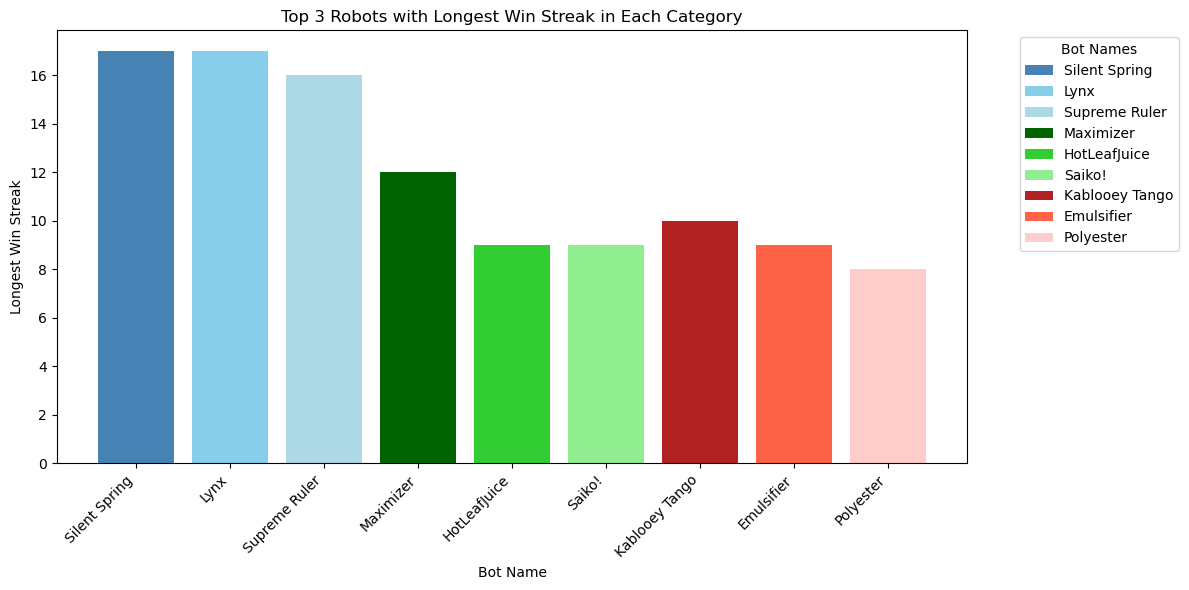

In [92]:
colors_3lb = ['#4682b4', '#87ceeb', '#add8e6']
colors_12lb = ['#006400', '#32cd32', '#90ee90']
colors_30lb = ['#b22222', '#ff6347', '#ffcccb']

colors = colors_3lb + colors_12lb + colors_30lb

plt.figure(figsize=(12, 6))
bars = plt.bar(top_bots["Bot Name"], top_bots["Longest Win Streak"], color=colors)

for bar, name in zip(bars, top_bots["Bot Name"]):
    bar.set_label(name)

plt.xlabel("Bot Name")
plt.ylabel("Longest Win Streak")
plt.title("Top 3 Robots with Longest Win Streak in Each Category")
plt.legend(title="Bot Names", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Is there a significant relationship between fight duration and win percentage?

#### To determine this, I'll compute a correlation cooefficient and preform a hypothesis test. I'll look for a p value of less than 0.05

#### Correlation cooefficient. Note that a result closer to + or - 1 indicates a strong relationship, while one closser to zero indicates none

In [31]:
correlation3lb = robot3lb_df['Average Time'].corr(robot3lb_df['%'])
correlation3lb

0.3113529513840663

In [32]:
correlation12lb = robot12lb_df['Average Time'].corr(robot12lb_df['%'])
correlation12lb

0.3675292828283278

In [33]:
correlation30lb = robot30lb_df['Average Time'].corr(robot30lb_df['%'])
correlation30lb

0.28038452554314036

#### find p-value

In [55]:
corr_coefficient, p_value = stats.pearsonr(robot3lb_df['Average Time'], robot3lb_df['%'])

print(f"Pearson Correlation: {corr_coefficient}")
print(f"P-value: {p_value:0.35f}")

Pearson Correlation: 0.31135295138406605
P-value: 0.00000000000000000000000003374845371


In [56]:
corr_coefficient, p_value = stats.pearsonr(robot12lb_df['Average Time'], robot12lb_df['%'])

print(f"Pearson Correlation: {corr_coefficient}")
print(f"P-value: {p_value:0.35f}")

Pearson Correlation: 0.3675292828283272
P-value: 0.00000001542544490976935577023430033


In [57]:
corr_coefficient, p_value = stats.pearsonr(robot30lb_df['Average Time'], robot30lb_df['%'])

print(f"Pearson Correlation: {corr_coefficient}")
print(f"P-value: {p_value:0.35f}")

Pearson Correlation: 0.2803845255431402
P-value: 0.00034399386873846268895121847108953


#### Given the low p-value in all three weight classes, I can conclude that there is not a significant relationship fight duration and win percentage

### Which weight class has the highest average knockout rate? 

#### To calculate the average knockout rate, I'll create a new column called total K0s to indicate how many of a robot's fights ended in a KO

In [63]:
robot3lb_df['Total KOs'] = robot3lb_df['KOs'] + robot3lb_df["KO'd"]
robot12lb_df['Total KOs'] = robot12lb_df['KOs'] + robot12lb_df["KO'd"]
robot30lb_df['Total KOs'] = robot30lb_df['KOs'] + robot30lb_df["KO'd"]

#### Divide total KOs by the number of fights to find KO rate

In [64]:
robot3lb_df['KO Rate'] = robot3lb_df['Total KOs'] / robot3lb_df['Fights']
robot12lb_df['KO Rate'] = robot12lb_df['Total KOs'] / robot12lb_df['Fights']
robot30lb_df['KO Rate'] = robot30lb_df['Total KOs'] / robot30lb_df['Fights']

#### find the mean accross all robots in the dataframe

In [65]:
average_ko_rate_3lb = robot3lb_df['KO Rate'].mean()
print(f"Average KO Rate at 3lbs: {average_ko_rate_3lb:.2%}")

average_ko_rate_12lb = robot12lb_df['KO Rate'].mean()
print(f"Average KO Rate at 12lbs: {average_ko_rate_12lb:.2%}")

average_ko_rate_30lb = robot30lb_df['KO Rate'].mean()
print(f"Average KO Rate at 30lbs: {average_ko_rate_30lb:.2%}")

Average KO Rate at 3lbs: 55.07%
Average KO Rate at 12lbs: 56.21%
Average KO Rate at 30lbs: 60.86%


#### Plot the data. I used ai to help with the graphing

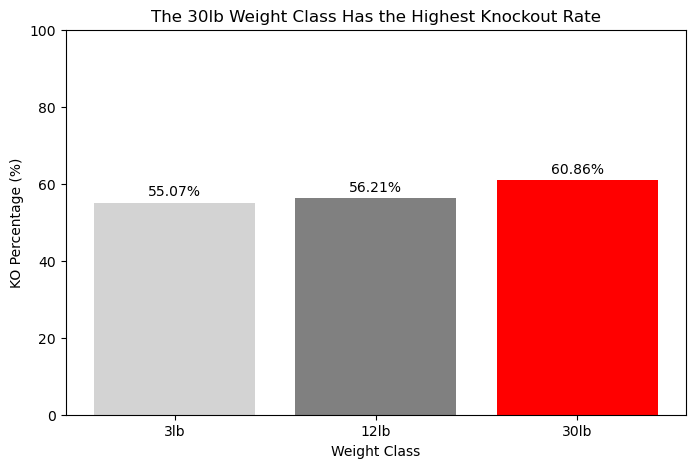

In [73]:
weight_classes = ['3lb', '12lb', '30lb']
ko_percentages = [average_ko_rate_3lb * 100, average_ko_rate_12lb * 100, average_ko_rate_30lb * 100]  # Convert to percentage

max_index = ko_percentages.index(max(ko_percentages))
min_index = ko_percentages.index(min(ko_percentages))

colors = ['lightgrey' if i == min_index else 'grey' if i != max_index else 'red' for i in range(len(ko_percentages))]

plt.figure(figsize=(8, 5))
bars = plt.bar(weight_classes, ko_percentages, color=colors)

plt.ylim(0, 100)

plt.xlabel('Weight Class')
plt.ylabel('KO Percentage (%)')
plt.title('The 30lb Weight Class Has the Highest Knockout Rate')

for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
             f'{ko_percentages[i]:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

plt.show()


### What percentage of robots in each weight class have a win rate above 75%?
#### This could help determine the number of “top” robots in each class, and get a better understanding of the competitive depth of each class.

#### Filter each dataframe by winrate

In [77]:
highWinRate3lb = robot3lb_df[robot3lb_df['%'] > 0.75]
highWinRate12lb = robot12lb_df[robot12lb_df['%'] > 0.75]
highWinRate30lb = robot30lb_df[robot30lb_df['%'] > 0.75]

32


1102

#### Find the percentage

In [87]:
percentageHighWinRate3lb = (len(highWinRate3lb) / len(robot3lb_df)) * 100
percentageHighWinRate12lb = (len(highWinRate12lb) / len(robot12lb_df)) * 100
percentageHighWinRate30lb = (len(highWinRate30lb) / len(robot30lb_df)) * 100

print(f"Percentage of 3lb robots above a 75% winrate: {percentageHighWinRate3lb:.2}%")
print(f"Percentage of 12lb robots above a 75% winrate: {percentageHighWinRate12lb:.2}%")
print(f"Percentage of 30lb robots above a 75% winrate: {percentageHighWinRate30lb:.2}%")

Percentage of 3lb robots above a 75% winrate: 2.9%
Percentage of 12lb robots above a 75% winrate: 3.6%
Percentage of 30lb robots above a 75% winrate: 3.1%


#### Graph

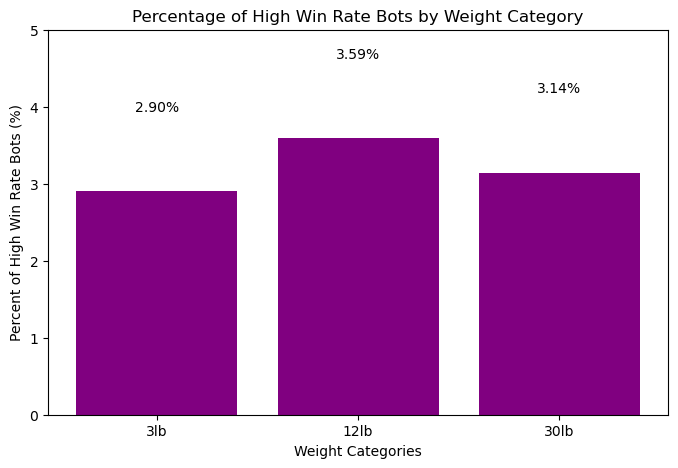

In [90]:
weightCategories = ['3lb', '12lb', '30lb']
highWinRatePercentages = [
    percentageHighWinRate3lb, 
    percentageHighWinRate12lb, 
    percentageHighWinRate30lb
] 

plt.figure(figsize=(8, 5))
plt.bar(weightCategories, highWinRatePercentages, color='purple')

plt.xlabel('Weight Categories')
plt.ylabel('Percent of High Win Rate Bots (%)')
plt.title('Percentage of High Win Rate Bots by Weight Category')

for i, percentage in enumerate(highWinRatePercentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

plt.ylim(0, 5) 
plt.show()